In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 185 runs
Auto parsing failed with: test-cmd_200202-182019
Auto parsing failed with: test-cmd_200202-182140
Auto parsing failed with: test-cmd_200202-182804
Auto parsing failed with: test-cmd_200202-183508
Auto parsing failed with: test-cmd_200202-192959
Auto parsing failed with: test-cmd_200202-194400
Auto parsing failed with: test-pycharm_200202-162713
Auto parsing failed with: test-pycharm_200202-162914
Auto parsing failed with: test-pycharm_200202-164740
Auto parsing failed with: test-pycharm_200202-170552
Auto parsing failed with: test-pycharm_200202-170706
Auto parsing failed with: test-pycharm_200202-170949
Auto parsing failed with: test-pycharm_200202-171055
Auto parsing failed with: test-pycharm_200202-171241
Auto parsing failed with: test-pycharm_200202-171339
Auto parsing failed with: test-pycharm_200202-171905
Auto parsing failed with: test-pycharm_200202-172322
Auto parsing failed with: test-pycharm_200202-174040
Auto parsing failed with: test-pycharm_200202-174451
Au

In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [28]:
M.clear_filters().filter_strs('!test')


M.filter_jobs(60)
# M.filter_models('ae')
# M.filter_datasets('3dshapes')
# M.filter(lambda r: 'n/adain-dec' in r.config.info.history or 'n/adain-large' in r.config.info.history)
# M.filter_models('wgan')

M.filter_datasets('box-s2')
# M.filter_datasets('mpi3d')
# M.filter_datasets('3dshapes')

M.prep_info()
# M.filter_min(ckpt=35)

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date').sort_by('job')
pass
M.show()


Selecting checkpoint: last
Loaded configs
  0) box-s2-ae_0060-6050841-00_200202-182231
  1) box-s2-wae_0060-6050841-01_200202-182239
  2) box-s2-vae_0060-6050841-02_200202-182230
  3) box-s2-vae_0060-6050841-03_200202-182238
  4) box-s2-fae_0060-6050841-04_200202-182235
  5) box-s2-fwae_0060-6050841-05_200202-182403
  6) box-s2-fvae_0060-6050841-06_200202-182237


In [29]:
# M.prep_info(100)
M.prep_info()
# M.load_records(tqdm)

Selecting checkpoint: last
Loaded configs


In [30]:
M.show('ckpt')

  0) box-s2-ae_0060-6050841-00_200202-182231
	Checkpoint: 36 (approx 72000 steps)

  1) box-s2-wae_0060-6050841-01_200202-182239
	Checkpoint: 36 (approx 72000 steps)

  2) box-s2-vae_0060-6050841-02_200202-182230
	Checkpoint: 36 (approx 72000 steps)

  3) box-s2-vae_0060-6050841-03_200202-182238
	Checkpoint: 36 (approx 72000 steps)

  4) box-s2-fae_0060-6050841-04_200202-182235
	Checkpoint: 34 (approx 68000 steps)

  5) box-s2-fwae_0060-6050841-05_200202-182403
	Checkpoint: 36 (approx 72000 steps)

  6) box-s2-fvae_0060-6050841-06_200202-182237
	Checkpoint: 36 (approx 72000 steps)



In [31]:
M.clear_run_cache()

In [33]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
tmpl= 'unbuffer python hybrid.py n/t/box-s3 --load {}'#' --model.lr 5e-4'
# tmpl= 'unbuffer python hybrid.py --legacy 0 --resume {}'

print('\n'.join(tmpl.format(n) for n in M.through().name))

unbuffer python hybrid.py n/t/box-s3 --load box-s2-ae_0060-6050841-00_200202-182231
unbuffer python hybrid.py n/t/box-s3 --load box-s2-wae_0060-6050841-01_200202-182239
unbuffer python hybrid.py n/t/box-s3 --load box-s2-vae_0060-6050841-02_200202-182230
unbuffer python hybrid.py n/t/box-s3 --load box-s2-vae_0060-6050841-03_200202-182238
unbuffer python hybrid.py n/t/box-s3 --load box-s2-fae_0060-6050841-04_200202-182235
unbuffer python hybrid.py n/t/box-s3 --load box-s2-fwae_0060-6050841-05_200202-182403
unbuffer python hybrid.py n/t/box-s3 --load box-s2-fvae_0060-6050841-06_200202-182237


In [10]:
run = M[0]
run.name

'3dshapes-wgan_0036-6048638-00_200131-185619'

In [11]:
M.clear_run_cache()

In [12]:
S = run.reset()

In [13]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [14]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-wgan_0036-6048638-00_200131-185619/checkpoint_30.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-wgan_0036-6048638-00_200131-185619/checkpoint_30.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
dataroot: /is/ei/fleeb/workspace/local_data (in parent)
load_memory: True (by default)
train: True
labeled: False (by default)
noise: None (by default)
din: (3, 64, 64) (by default)
dout: (3, 64, 64) (by default)
Dataset moved to cpu
Model-type: wgan
Creating encoder (type=double-enc)
  in_shape --> din: (3, 64, 64) (in parent)
  channels: [64, 64, 64, 128, 128] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 12 (in parent)
  Creating tail (type=mlp)
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 12
    hidden_dims: [256, 1

In [15]:
run.run(pbar=tqdm)

Using batched data loader


/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [16]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-wgan_0036-6048638-00_200131-185619/checkpoint_30.pth.tar'

In [17]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


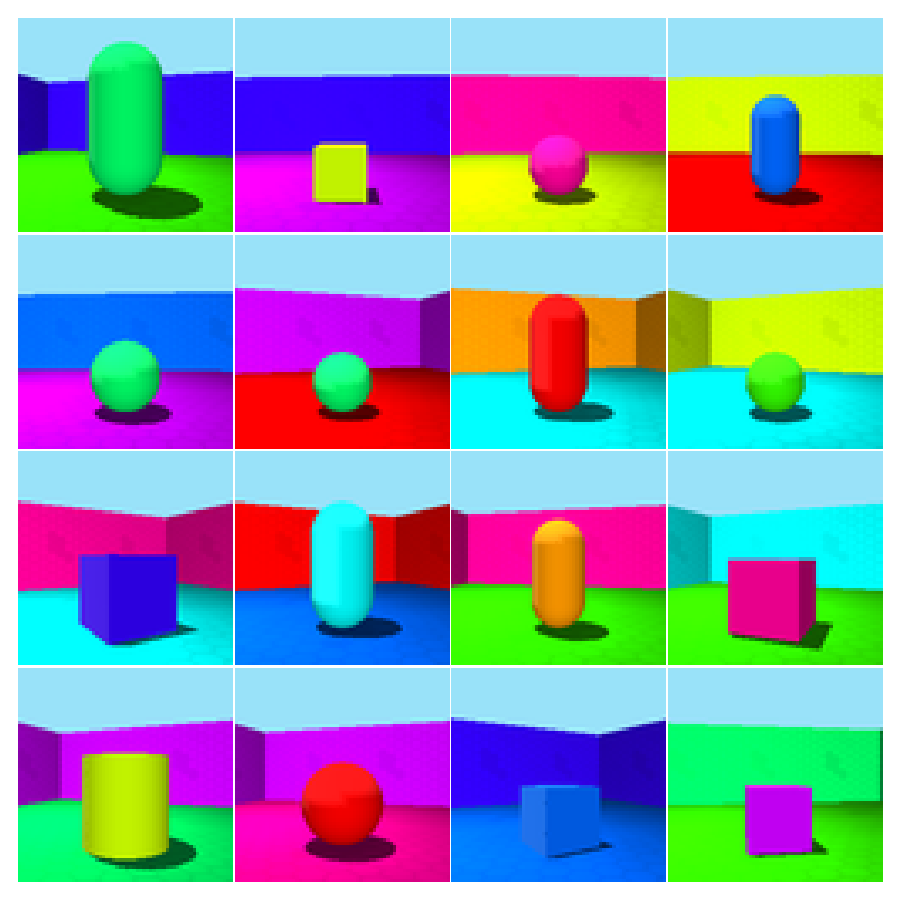

In [18]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


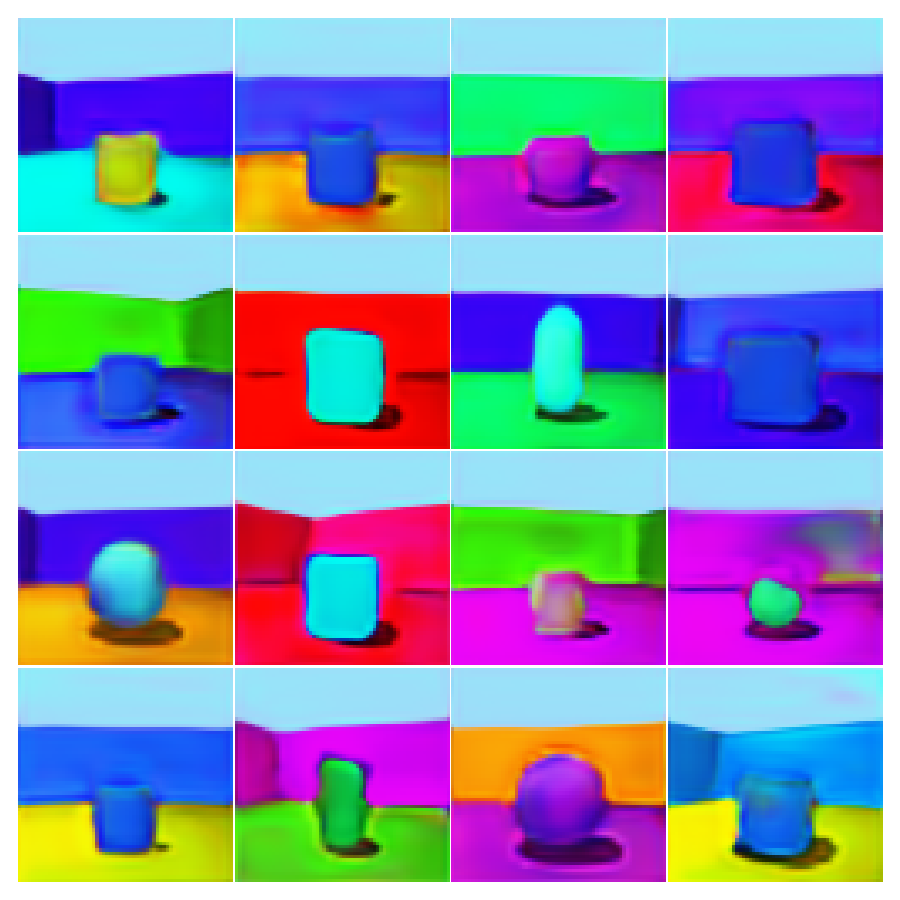

In [19]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


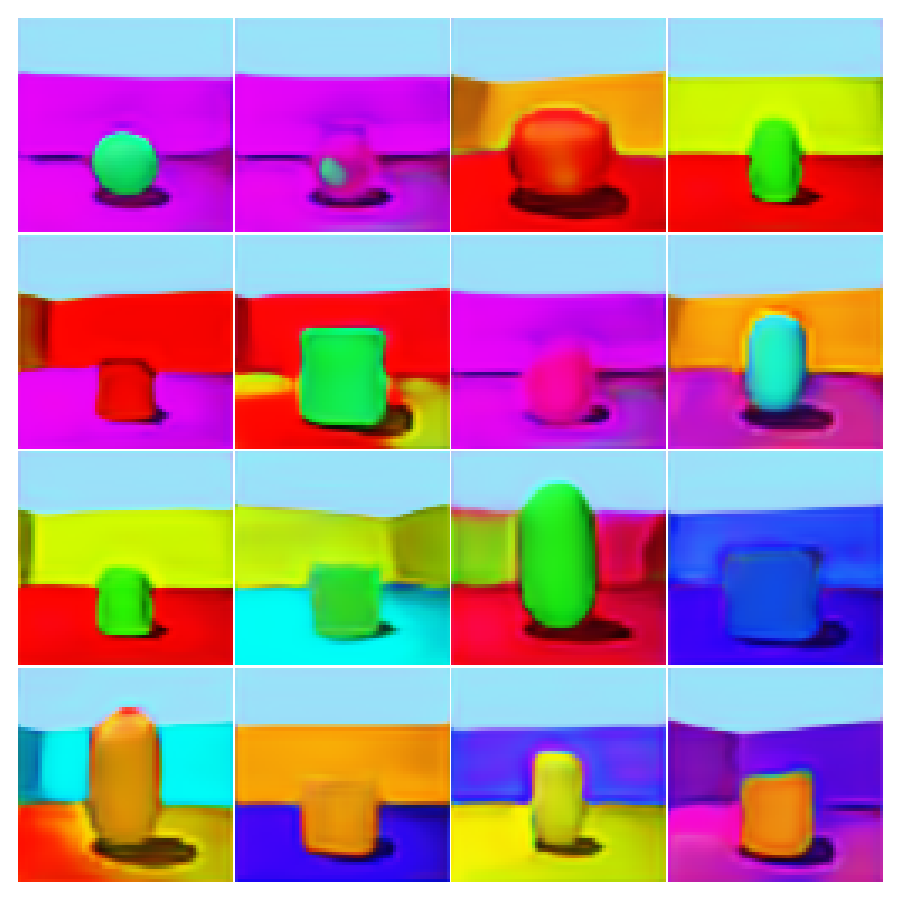

In [20]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


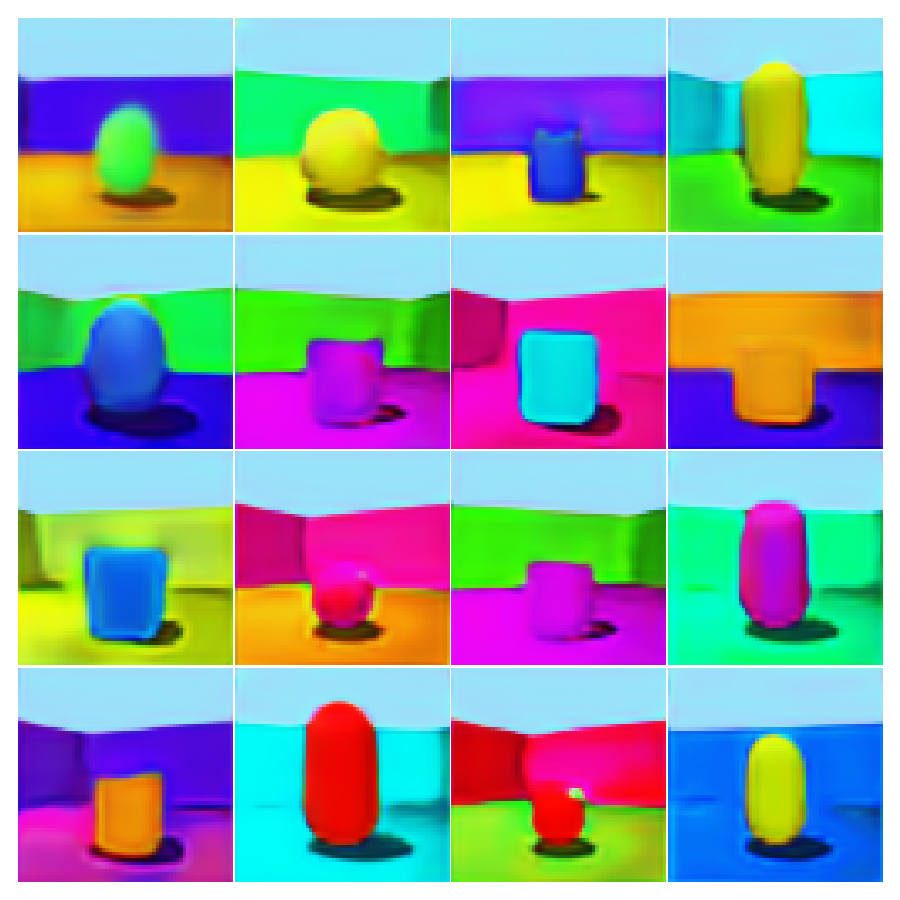

In [21]:
viz['gens'][0].view(scale=2)

In [22]:
viz['traversals'][0].view(scale=2)

<IPython.core.display.Javascript object>


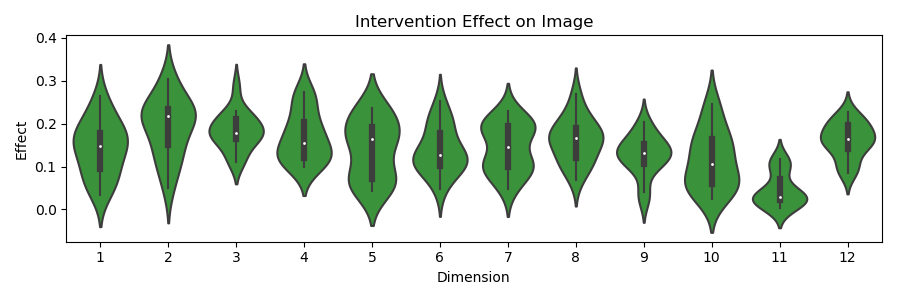

In [23]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


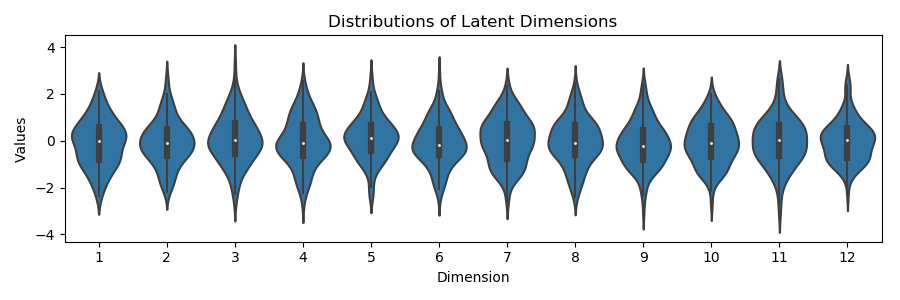

In [24]:
fig = viz['latent'][0].view(scale=2)
# # plt.figure(fig.number)
# # ax = fig.get_axes()[0]
# # ax.set_ylim(-3, 3)
fig

In [46]:
evals = run.evaluate(pbar=tqdm)

--- Evaluating: FID-prior


/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))



Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-wgan_0036-6048638-00_200131-185619/checkpoint_30.pth.tar
... took: 133.73
FID-prior: 114.03176823696168

--- Evaluating: FID-hyb
... took: 0.00
FID-hyb: None

--- Evaluating: FID-rec
... took: 0.00
FID-rec: None

--- Evaluating: IRS
... took: 0.00
IRS: None

--- Evaluating: MIG
... took: 0.00
MIG: None

--- Evaluating: DCI
... took: 0.00
DCI: None

--- Evaluating: SAP
... took: 0.00
SAP: None

--- Evaluating: ModExp
... took: 0.00
ModExp: None

--- Evaluating: Unsup
... took: 0.00
Unsup: None



In [26]:
# update_checkpoint(S, 'evals', overwrite=True)

In [27]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [28]:
# run.ckpt_path

In [29]:
# run.meta.history

In [30]:
# print(run.state.model)

In [31]:
# S.keys()

In [32]:
# S.hello = 'world'

In [33]:
# update_checkpoint(S, 'hello')

In [34]:
# viz_

In [35]:
# S.fid_gen_stats.keys()

In [36]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [37]:
# import pickle

In [38]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [39]:
# f

In [40]:
# run.state.keys()

In [41]:
# model = run.state.model

In [42]:
# q = run.state.q
# q.shape

In [43]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [44]:
# show_nums(imgs)

In [45]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/gans/'
run.save(media_root, overwrite=True)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/gans/3dshapes-wgan_0036-6048638-00_200131-185619_ckpt30
	Model saved
	Config saved
	Visualization saved


'/is/ei/fleeb/workspace/media/hybrid/gans/3dshapes-wgan_0036-6048638-00_200131-185619_ckpt30'